Name: jorge blanco
    
Student ID: 24246948

### Task 4: Model fitting challenge

**Important:** Note that your work on this task should **not** be posted publicly. This is an extra task that should only be submitted to Brightspace.

#### Introduction: feature engineering
In this final task, you will be given a data set and will have to try and fit it with an ANN. The challenge will come from the fact that while you will get data similar to what we used previously: two features $x$ and $y$, and a target output $group$, the value of $group$ has been calculated in a way that the ANN will not be naturally able to fit. This means that you will have to expand on the starting two features, through *feature engineering*.

Consider the data below:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

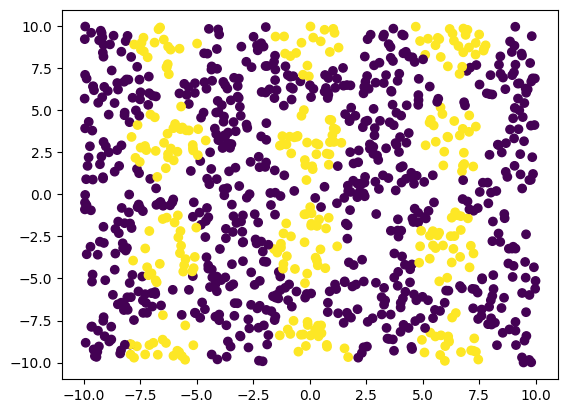

In [3]:
feateng_nsamples = 1000

feateng_x = np.random.rand(feateng_nsamples) * 20 - 10
feateng_y = np.random.rand(feateng_nsamples) * 20 - 10

feateng_group = np.ones(feateng_nsamples)

for i in range(feateng_nsamples):
    if ( 0.6*np.cos(feateng_x[i]) - 0.4*np.cos(feateng_y[i]) - .3 < 0):
        feateng_group[i] = 1
    else:
        feateng_group[i] = 2
        
feateng_data = np.column_stack((feateng_x, feateng_y, feateng_group))
plt.scatter(feateng_x, feateng_y, c=feateng_group)

The group of each observation (1 or 2, mapped to yellow and blue) is a direct function of the input features $x$ and $y$. But were we to try and train an ANN to fit the data, it'd have trouble fitting it well. A complex enough model with multiple hidden layers might be able to fit, but it probably wouldn't work out well for data generated in the same way but outside of the $[-10,10]$ interval used in training. This is because the data is based on $cos(x)$ and $cos(y)$, which can't easily be modelled through weighted sums of $x$ and $y$.

In order to find the best possible model, we would need to engineer two new features from the existing ones: from $x$ and $y$, we will generate $cos(x)$ and $cos(y)$:

In [4]:
feateng_cosx = np.cos(feateng_x)
feateng_cosy = np.cos(feateng_y)
feateng_data = np.column_stack((feateng_x, feateng_y, feateng_cosx, feateng_cosy, feateng_group))

If we use these 4 features to try and $group$, the ANN will have a far easier time. Instead of trying to predict $group$ simply from weighted sums of $x$ and $y$, the ANN will try to predict $group$ from weighted sums of $x$, $cos(x)$, $y$ and $cos(y)$. And it should quickly find that the best fit only uses $cos(x)$ and $cos(y)$, and converge until it finds the combination of weights and bias that work best. While this is **not** part of thie E-tivity, feel free to experiment on the side and try to fit an ANN to the data above, first only with $x$ and $y$, then with the enriched data. The latter should perform far better.

Of course, when trying to fit some data, you will rarely know in advance what specific features will lead to a better fit. So there is an exercise in trying to think of what the shape of the data might come from, as well as some trial and error generating additional features and trying to fit models. But the common thread of engineered features is that the ones likely to provide considerable improvements are the features that can't trivially be calculated from a weighted sum. There would be no point to create a feature for $2\times x$ and $3\times x$ for example, as the ANN will naturally try various weights to multiply $x$ by.

#### Introduction: the mystery data

In addition to this notebook, you should have been provided with the "t4_data.csv" CSV file. The code below will load that file as a numpy array and plot it. The data contains three columns: two features, and a target class. For plotting purposes we plot the first feature as $x$, the second feature as $y$, and colour the dots according to class.

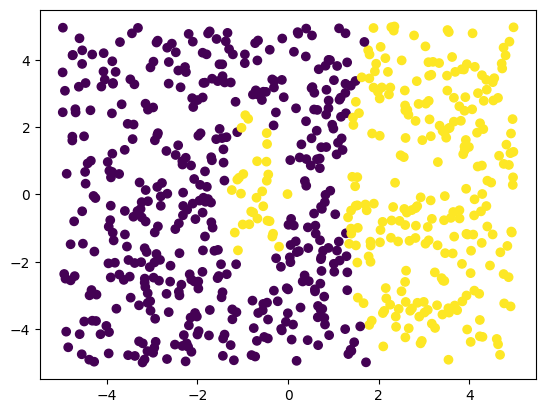

In [5]:
mydata = np.genfromtxt('t4_data.csv', delimiter=',')
plt.scatter(mydata[:,0], mydata[:,1], c=mydata[:,2])

#### Coding task
Your job is to use the sklearn MLPClassifier and train a model that can predict the class as accurately as possible.
 * You can play with the various options available in MLPClassifier (hidden layers, solver...).
 * It is recommended that you split your data into training/testing to avoid the risk of designing an overly complex model that overfits.
 * You only have two initial features, let's call them $x$ and $y$. These are unlikely to easily generate a good fitting model due to how the data was generated in the first place. You will need to either design a complex model, or do some clever feature engineering and create extra features out of these two. Think of what values based on $x$, $y$ or both wouldn't be naturally represented through a weighted sum, enrich your source data with these extra columns, and see if you can improve your classification.
 * Print out your final accuracy on training/testing data and plot your model's predictions also both on training/testing data.
 * Target is >95% accuracy over both sets, and in order to get the max grade of 20, you'll need to reach this with a single hidden layer.

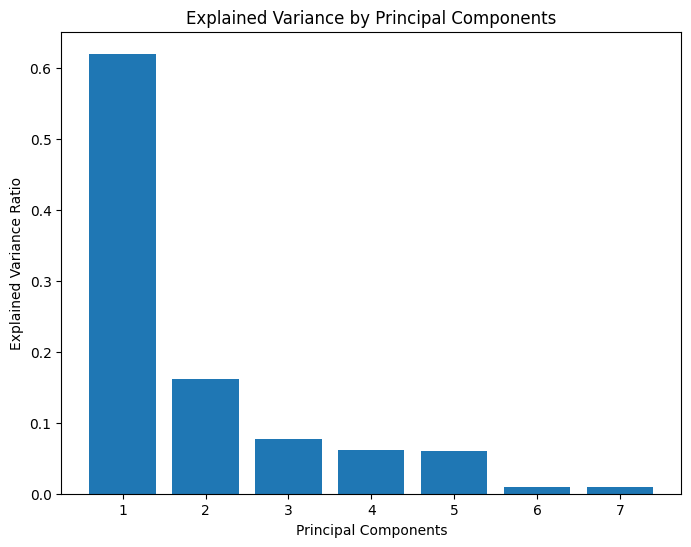

Training: 0.99%
Testing: 0.99%


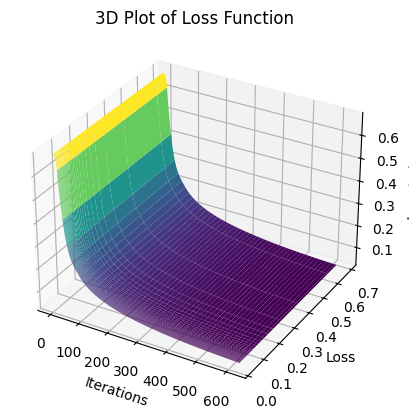

In [18]:
x = mydata[:,0]
y = mydata[:,1]

Y = mydata[:,2]

X = np.column_stack((x, y))

# features added 
# 1) Interaction Features = x*y
# 2) Polynomial Features = y**2 x**2
# 3) in the description sin and cos is used , having both cos makes it worst (sin-sin and cos-sin - works great) - cyclical features

X = np.column_stack((X, x*y, y**2, x**2, np.sin(x), np.sin(y)))

# Apply PCA
pca = PCA(n_components=7)
df_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# split data into training + testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# init + fit the MLPClassifier
# having adam makes that .1% diff to 1.00% accuracy
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10000, batch_size=10, solver='adam', random_state=1)
clf.fit(X_train, y_train)

# predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# accuracy score
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training: {training_accuracy:.2f}%')
print(f'Testing: {testing_accuracy:.2f}%')

# ------------- personal ref --------------------

# Get the loss curve from the training process
loss_curve = clf.loss_curve_

# Create a meshgrid for plotting the loss function in 3D
x = np.arange(len(loss_curve))
y = np.array(loss_curve)
X, Y = np.meshgrid(x, y)
Z = np.array([loss_curve for _ in range(len(loss_curve))])

# Plot the loss function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_zlabel('Loss Value')
ax.set_title('3D Plot of Loss Function')

plt.show()

## Reflection

